In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format="retina"

In [ ]:
import sys
from pygv.viewer import GenomeViewer
from pygv.tracks.bigwig_track import PairedStrandSpecificTracks, BigWigTrack
from pygv.tracks.bed_track import BedTrack

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from customized_styles import _pos_color, _neg_color
from utils import get_bioqueue_file

In [ ]:
gv = GenomeViewer(inward_ticks=True, n_ticks=3)
log_gv = GenomeViewer(inward_ticks=True, n_ticks=3)
_cell_labels = ("WT", "KO", )
plot_labels = {
    "WT": "0h",
    "KO": "6h"
}
ctcf_chips = {
    "KO": get_bioqueue_file("{{History:25167-ENCFF404ZKM.bigWig}}"),
    "WT": get_bioqueue_file("{{History:25166-ENCFF082DZZ.bigWig}}")
}
for i, label in enumerate(_cell_labels):
    for j, gv_obj in enumerate((gv, log_gv)):
        _target = PairedStrandSpecificTracks(
            get_bioqueue_file("{{History:20843-%s.ds.pl.bw}}" % label),
            get_bioqueue_file("{{History:20843-%s.ds.mn.bw}}" % label),
            name="Initiation", pos_color=_pos_color, neg_color=_neg_color, 
            y_tick_format="{:0.1f}", 
            height=0.8
        )
        if j: _target.data_transform = "asinh"
        gv_obj.add_track(_target)
        
        _pred = PairedStrandSpecificTracks(
            (
                get_bioqueue_file("{{History:25164-log_r1/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:25164-log_r2/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:25164-log_r3/%s.pl.bw}}" % label.lower()),
            ),
            (
                get_bioqueue_file("{{History:25164-log_r1/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:25164-log_r2/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:25164-log_r3/%s.mn.bw}}" % label.lower()),
            ),
            name=f"Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
            height=0.8
        )
        if j: _pred.data_transform = "asinh"
        gv_obj.add_track(_pred)
        
        ctcf = BigWigTrack(
            ctcf_chips[label],
            name=f"CTCF\nChIP-seq", color="#99d98c", y_tick_format="{:0.1f}", height=0.6)
        gv_obj.add_track(ctcf)
        
        acc = BigWigTrack(
            get_bioqueue_file("{{History:20843-atac_ds.%s.bw}}" % label),
            name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6)
        if j: acc.data_transform = "asinh"
        gv_obj.add_track(acc)

for gv_obj in (gv, log_gv):
    annot = BedTrack(
        "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
        height=0.3, show_name=True, name="RefSeq")
    annot.edge_color = "#5E5E5E"
    annot.color = "#5E5E5E"
    annot.allowed_feature_lanes = 1
    gv_obj.add_track(annot)

    gv_obj.add_group_label(0, 3, "0h", -0.35)
    gv_obj.add_group_label(4, 7, "6h", -0.35)

    gv_obj.add_group_autoscale([0, 4])
    gv_obj.add_group_autoscale([1, 5])
    gv_obj.add_group_autoscale([2, 6])
    gv_obj.add_group_autoscale([3, 7])

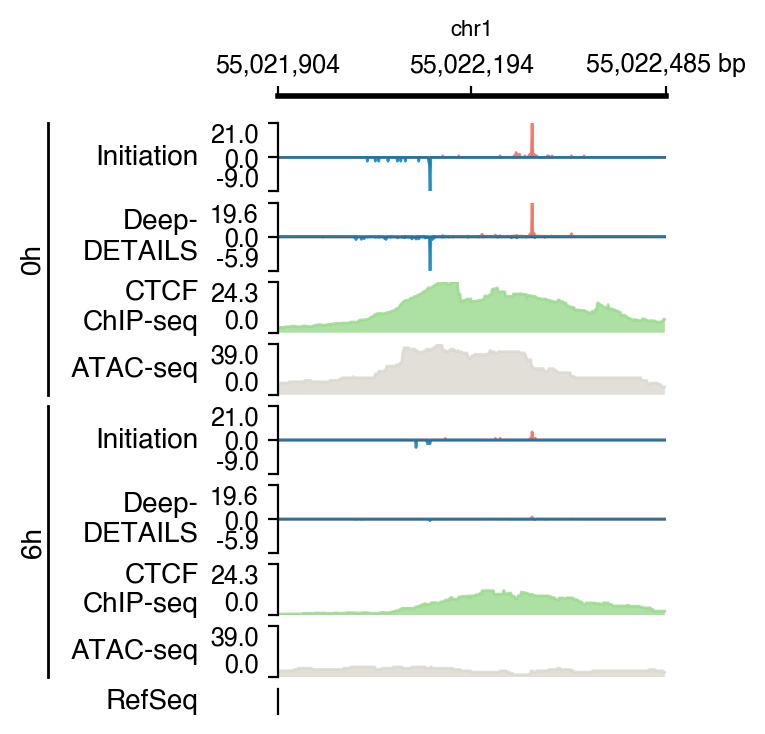

In [ ]:
gv.plot("chr1", 55021904, 55022485, fig_width=2.5, height_scale_factor=0.65)

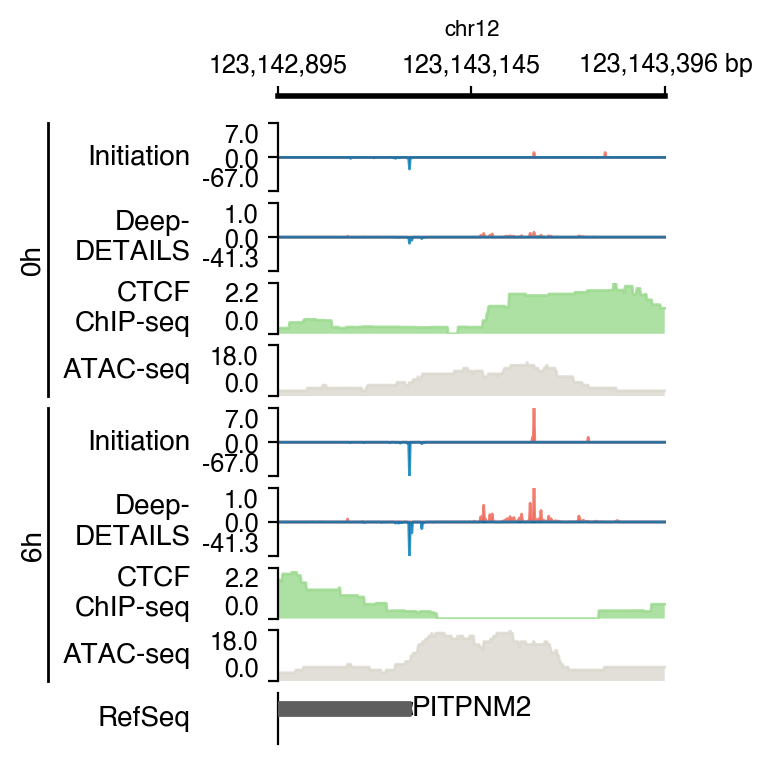

In [ ]:
gv.plot("chr12", 123142895, 123143396, fig_width=2.5, height_scale_factor=0.65)